In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt
%matplotlib inline

/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
sns.set_theme(
    font_scale = 2,                         # размер шрифта
    style      = 'whitegrid',               # стиль поля графика
    rc         = {'figure.figsize':(20,10)}  # размер фигуры
)

•	timestamp – дата и время (точность до часа)

•	cnt – количество аренд велосипедов за этот час

•	t1 – температура, в С

•	t2 – температура "ощущается как", в С 

•	hum – влажность (%)

•	wind_speed – скорость ветра, км/ч

•	weather_code – погодные условия:

1 – ясно (SKC)

2 – преимущественно ясно / встречаются отдельные облака (SCT)

3 – облачно / значительные облака (BKN)

4 – пасмурно (OVC)

7 – небольшой дождь Rain/ light Rain shower/ Light rain 

10 – дождь с грозой

26 – снегопад 

94 – ледяной туман (да, такое бывает!)

•	isholiday – является ли день праздником (1 – праздник, 0 – нет)

•	isweekend –  является ли день выходным (1 – выходной, 0 – нет)

•	season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)


1.	Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

In [ ]:
ln = pd.read_csv('/Users/varya_hai/Karpov.courses/3.6 london.csv',parse_dates=['timestamp'])
ln.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
ln.shape

(17414, 10)

In [4]:
ln.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [5]:
ln.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

2.	Постройте график по числу поездок по дате и времени.

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

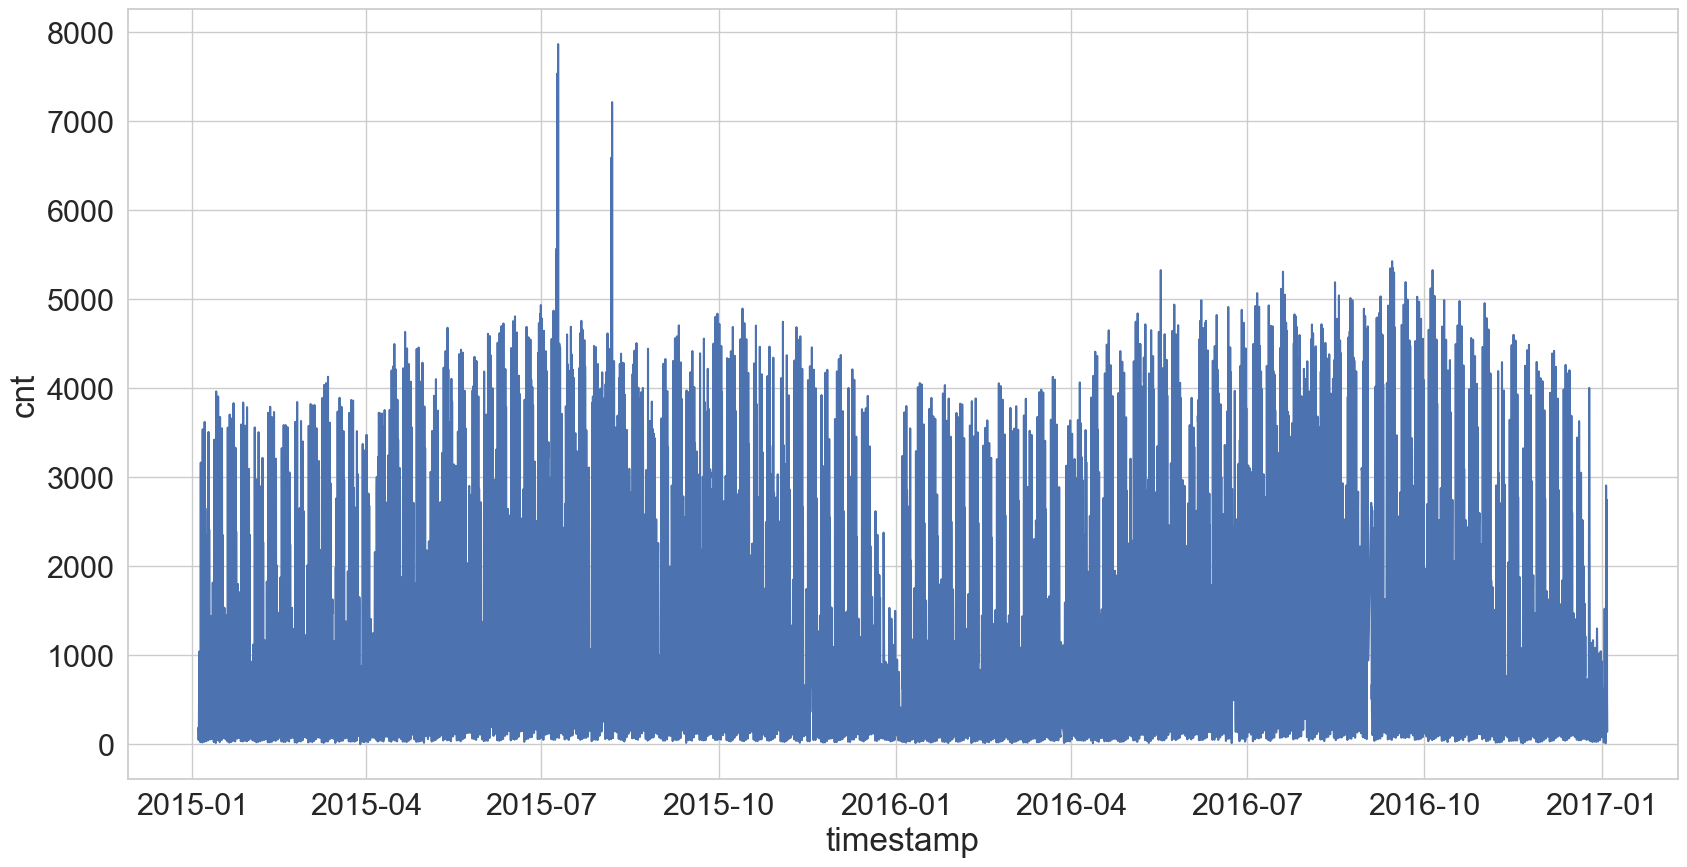

In [8]:
sns.lineplot(data=ln,x='timestamp',y='cnt')

3.	Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.

In [9]:
drives_per_day = ln.groupby(ln.timestamp.dt.date).cnt.sum().reset_index()

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

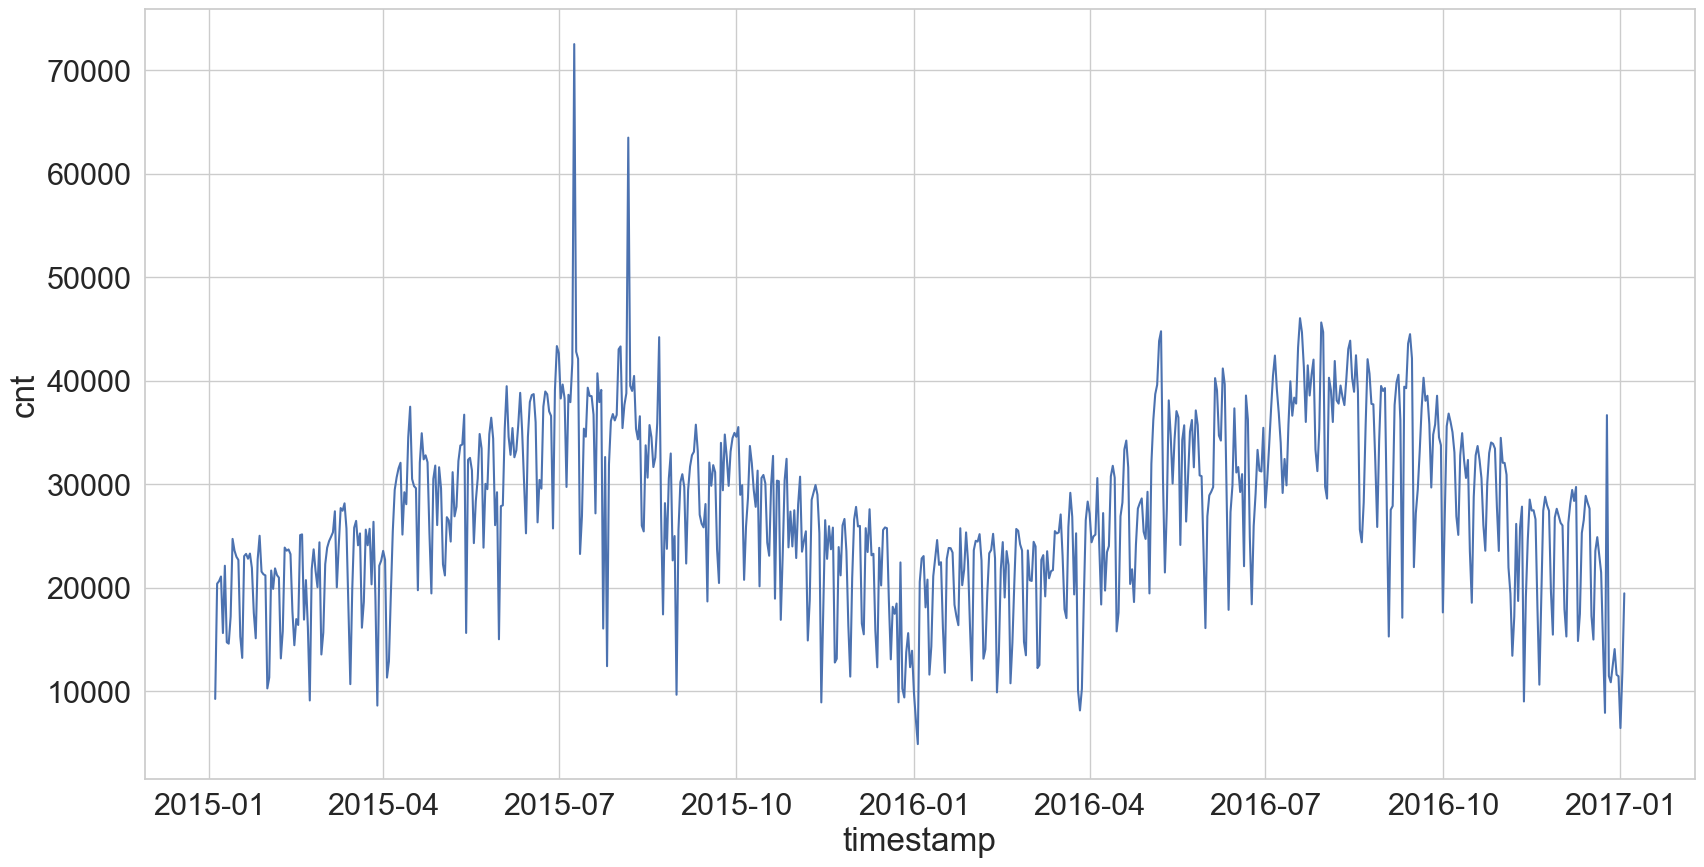

In [10]:
sns.lineplot(data=drives_per_day,x='timestamp',y='cnt')

4.	Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [11]:
drives_per_day['rol_mean'] = drives_per_day.cnt.rolling(3).mean()

In [12]:
drives_per_day.head()

,timestamp,cnt,rol_mean
0,2015-01-04,9234,NaN
1,2015-01-05,20372,NaN
2,2015-01-06,20613,16739.666667
3,2015-01-07,21064,20683.000000
4,2015-01-08,15601,19092.666667


In [13]:
drives_per_day.timestamp = drives_per_day.timestamp.astype('str')

In [14]:
drives_per_day.query('timestamp=="2015-07-09"').rol_mean.astype('int')

186    50705
Name: rol_mean, dtype: int64

5.	Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.

In [15]:
sd = np.std(drives_per_day.cnt - drives_per_day.rol_mean)

In [16]:
sd

4468.703275084391

6.	Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.

In [17]:
drives_per_day['lower_bound']=drives_per_day.rol_mean-2.58*sd

In [18]:
drives_per_day['upper_bound']=drives_per_day.rol_mean+2.58*sd

In [19]:
drives_per_day.tail()

,timestamp,cnt,rol_mean,lower_bound,upper_bound
725,2016-12-30,11566,12682.000000,1152.745550,24211.254450
726,2016-12-31,11424,12347.333333,818.078884,23876.587783
727,2017-01-01,6421,9803.666667,-1725.587783,21332.921116
728,2017-01-02,11823,9889.333333,-1639.921116,21418.587783
729,2017-01-03,19436,12560.000000,1030.745550,24089.254450


7.	Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.

In [20]:
drives_per_day[drives_per_day.cnt > drives_per_day.upper_bound]

,timestamp,cnt,rol_mean,lower_bound,upper_bound
186,2015-07-09,72504,50705.000000,39175.745550,62234.254450
214,2015-08-06,63468,46627.333333,35098.078884,58156.587783
720,2016-12-25,36653,19650.666667,8121.412217,31179.921116


8.	Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

In [21]:
drives_per_day[drives_per_day.cnt < drives_per_day.lower_bound]

,timestamp,cnt,rol_mean,lower_bound,upper_bound
130,2015-05-14,15609,28709.333333,17180.078884,40238.587783
189,2015-07-12,23240,36036.666667,24507.412217,47565.921116
201,2015-07-24,16034,31013.666667,19484.412217,42542.921116
232,2015-08-24,17400,29529.333333,18000.078884,41058.587783
314,2015-11-14,8898,21037.333333,9508.078884,32566.587783
607,2016-09-03,15265,31174.666667,19645.412217,42703.921116
614,2016-09-10,17080,31262.000000,19732.745550,42791.254450
620,2016-09-16,21967,36193.333333,24664.078884,47722.587783
677,2016-11-12,8990,20878.000000,9348.745550,32407.254450
